In [27]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt

In [2]:
# Load data from Sentinel-2 (NDVI) and Sentinel-5P (AQI)
Vondel_NDVI_csv = pd.read_csv("Datasets/Sentinel-2/Sentinel2_Vondel/Sentinel2_Vondel_CSV.csv")
Vondel_AQI_csv = pd.read_csv("Datasets/Sentinel-5P/AirQualityIndex_Vondel/AirQualityIndex_Vondel.csv")

In [3]:
# Check data structure
Vondel_NDVI_csv

,Date,Coordinates,Value
0,2024-03-01,"626205.0, 5802955.0",0.074513
1,2024-03-01,"626215.0, 5802955.0",0.072915
2,2024-03-01,"626225.0, 5802955.0",0.071516
3,2024-03-01,"626235.0, 5802955.0",0.068068
4,2024-03-01,"626245.0, 5802955.0",0.061473
...,...,...,...
271195,2024-06-01,"628155.0, 5801835.0",0.184967
271196,2024-06-01,"628165.0, 5801835.0",0.153550
271197,2024-06-01,"628175.0, 5801835.0",0.182766
271198,2024-06-01,"628185.0, 5801835.0",0.143232


In [4]:
# Check data structure
Vondel_AQI_csv

,Date,Coordinates,Value
0,2024-03-01,"626205.0, 5802955.0",28.314556
1,2024-03-01,"626215.0, 5802955.0",28.314556
2,2024-03-01,"626225.0, 5802955.0",28.314556
3,2024-03-01,"626235.0, 5802955.0",28.314556
4,2024-03-01,"626245.0, 5802955.0",28.314556
...,...,...,...
271195,2024-06-01,"628155.0, 5801835.0",22.487692
271196,2024-06-01,"628165.0, 5801835.0",22.487692
271197,2024-06-01,"628175.0, 5801835.0",22.487692
271198,2024-06-01,"628185.0, 5801835.0",22.487692


In [17]:
# Set index keys
# Vondel_NDVI_csv.set_index('Date', inplace=True)
# Vondel_AQI_csv.set_index('Date', inplace=True)

In [20]:
# Merge the two indices together on Date to ensure that Values are aligned
Vondel_merged_csv = pd.merge(Vondel_NDVI_csv, Vondel_AQI_csv, left_index=True, right_index=True, how="inner")
Vondel_merged_csv

,Date_x,Coordinates_x,Value_x,Date_y,Coordinates_y,Value_y
0,2024-03-01,"626205.0, 5802955.0",0.074513,2024-03-01,"626205.0, 5802955.0",28.314556
1,2024-03-01,"626215.0, 5802955.0",0.072915,2024-03-01,"626215.0, 5802955.0",28.314556
2,2024-03-01,"626225.0, 5802955.0",0.071516,2024-03-01,"626225.0, 5802955.0",28.314556
3,2024-03-01,"626235.0, 5802955.0",0.068068,2024-03-01,"626235.0, 5802955.0",28.314556
4,2024-03-01,"626245.0, 5802955.0",0.061473,2024-03-01,"626245.0, 5802955.0",28.314556
...,...,...,...,...,...,...
271195,2024-06-01,"628155.0, 5801835.0",0.184967,2024-06-01,"628155.0, 5801835.0",22.487692
271196,2024-06-01,"628165.0, 5801835.0",0.153550,2024-06-01,"628165.0, 5801835.0",22.487692
271197,2024-06-01,"628175.0, 5801835.0",0.182766,2024-06-01,"628175.0, 5801835.0",22.487692
271198,2024-06-01,"628185.0, 5801835.0",0.143232,2024-06-01,"628185.0, 5801835.0",22.487692


In [22]:
# Cleaning merged .csv
# Drop missing values and ensure you're working with a copy
Vondel_merged_csv_cleaned = Vondel_merged_csv.dropna().copy()

# Combine Date columns
Vondel_merged_csv_cleaned.loc[:, 'Date'] = Vondel_merged_csv_cleaned['Date_x'].combine_first(
    Vondel_merged_csv_cleaned['Date_y']
)

# Combine Coordinates columns
Vondel_merged_csv_cleaned.loc[:, 'Coordinates'] = Vondel_merged_csv_cleaned['Coordinates_x'].combine_first(
    Vondel_merged_csv_cleaned['Coordinates_y']
)

# Drop redundant columns
Vondel_merged_csv_cleaned.drop(columns=['Date_x', 'Date_y', 'Coordinates_x', 'Coordinates_y'], inplace=True)

# Rename Value columns to NDVI and AQI
Vondel_merged_csv_cleaned.rename(columns={'Value_x': 'NDVI', 'Value_y': 'AQI'}, inplace=True)

Vondel_merged_csv_cleaned

,NDVI,AQI,Date,Coordinates
0,0.074513,28.314556,2024-03-01,"626205.0, 5802955.0"
1,0.072915,28.314556,2024-03-01,"626215.0, 5802955.0"
2,0.071516,28.314556,2024-03-01,"626225.0, 5802955.0"
3,0.068068,28.314556,2024-03-01,"626235.0, 5802955.0"
4,0.061473,28.314556,2024-03-01,"626245.0, 5802955.0"
...,...,...,...,...
271195,0.184967,22.487692,2024-06-01,"628155.0, 5801835.0"
271196,0.153550,22.487692,2024-06-01,"628165.0, 5801835.0"
271197,0.182766,22.487692,2024-06-01,"628175.0, 5801835.0"
271198,0.143232,22.487692,2024-06-01,"628185.0, 5801835.0"


In [29]:
# Conduct correlation tests
Vondel_NDVI_Values = Vondel_merged_csv_cleaned.loc[:, 'NDVI']
Vondel_AQI_Values = Vondel_merged_csv_cleaned.loc[:, 'AQI']

pearson_corr, p_pearson = pearsonr(Vondel_NDVI_Values, Vondel_AQI_Values)
spearman_corr, p_spearman = spearmanr(Vondel_NDVI_Values, Vondel_AQI_Values)
kendall_corr, p_kendall = kendalltau(Vondel_NDVI_Values, Vondel_AQI_Values)

print("Pearson's Correlation:")
print(f"Coefficient: {pearson_corr:.4f}, p-value: {p_pearson:.4e}")

print("\nSpearman's Correlation:")
print(f"Coefficient: {spearman_corr:.4f}, p-value: {p_spearman:.4e}")

print("\nKendall's Tau Correlation:")
print(f"Coefficient: {kendall_corr:.4f}, p-value: {p_kendall:.4e}")

Pearson's Correlation:
Coefficient: 0.0342, p-value: 3.2664e-65

Spearman's Correlation:
Coefficient: 0.1534, p-value: 0.0000e+00

Kendall's Tau Correlation:
Coefficient: 0.1136, p-value: 0.0000e+00


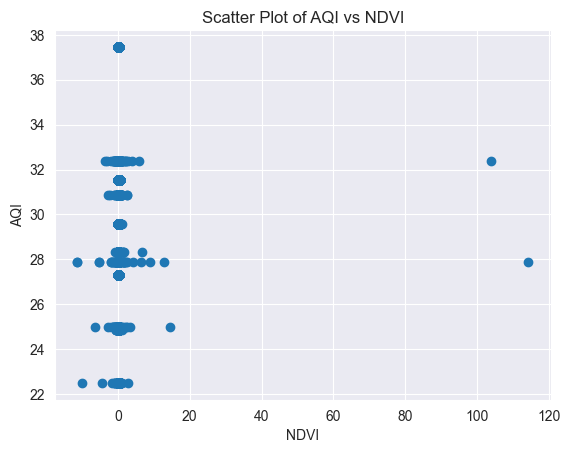

In [31]:
plt.scatter(Vondel_NDVI_Values, Vondel_AQI_Values)
plt.xlabel('NDVI')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs NDVI')
plt.show()